In [69]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/test'

flask_in = os.path.join(knmipath,'sample_coordinates_2007111000_2007111700.nc')
flask_mp = os.path.join(knmipath,'flask_output_TM5_MP_2007111000_2007111700.nc')
flask_esm = os.path.join(knmipath,'flask_output_ECE_2007111000_2007111700.nc')

flask_in_fh = nc.Dataset(flask_in,mode='r')
flask_mp_fh = nc.Dataset(flask_mp,mode='r')
flask_esm_fh = nc.Dataset(flask_esm,mode='r')

In [264]:
x = 40000000
fin_obs = flask_in_fh.variables['observed'][:x]
fin_date = flask_in_fh.variables['date_components'][:x]
obs_num = flask_in_fh.variables['obs_num'][:x]
lat = flask_in_fh.variables['latitude'][:x]
lon = flask_in_fh.variables['longitude'][:x]
alt = flask_in_fh.variables['altitude'][:x]
fmp_obs0 = flask_mp_fh.variables['flask'][:x,0] #Are 10 members. First check if it works with 1
fesm_obs = flask_esm_fh.variables['flask'][:x,0]

#check if the shapes are similar, meaning that they have the same number of points
print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))

#Code to transform the date components of the input file to a pandas series of timestamps
N = (len(fin_obs))
base = datetime.datetime(1900, 1, 1)
time = np.array([base + datetime.timedelta(hours=i) for i in xrange(N)])
for i in range(N):
    dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
    time[i] = pd.Timestamp(dt)

((25427,), (25427,), (25427,))
(25427,)


In [239]:
df = pd.DataFrame({'A_fin_obs' : fin_obs,
                   'B_fmp_obs' : fmp_obs0,
                   'C_fesm_obs': fesm_obs,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)


PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
#df[JFJ]

In [236]:
fig, ax = plt.subplots()
mask = JFJ
ax.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=.2, label='Observations')
ax.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=.2, label='TM5-Offline')
ax.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=.2, label='TM5-ESM')
plt.legend()
plt.show()


In [309]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'deaths_regiment_1': [34, 43, 14, 15, 15, 14, 31, 25, 62, 41],
        'deaths_regiment_2': [52, 66, 78, 15, 15, 5, 25, 25, 86, 1],
        'deaths_regiment_3': [13, 73, 82, 58, 52, 87, 26, 5, 56, 75],
        'deaths_regiment_4': [44, 75, 26, 15, 15, 14, 54, 25, 24, 72],
        'deaths_regiment_5': [25, 24, 25, 15, 57, 68, 21, 27, 62, 5],
        'deaths_regiment_6': [84, 84, 26, 15, 15, 14, 26, 25, 62, 24],
        'deaths_regiment_7': [46, 57, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths', 'deaths_regiment_1', 'deaths_regiment_2',
                                   'deaths_regiment_3', 'deaths_regiment_4', 'deaths_regiment_5',
                                   'deaths_regiment_6', 'deaths_regiment_7'])
df = df.set_index(df.date)
sns.tsplot([df.deaths_regiment_1, df.deaths_regiment_2, df.deaths_regiment_3, df.deaths_regiment_4,
            df.deaths_regiment_5, df.deaths_regiment_6, df.deaths_regiment_7], color="indianred")
plt.show()

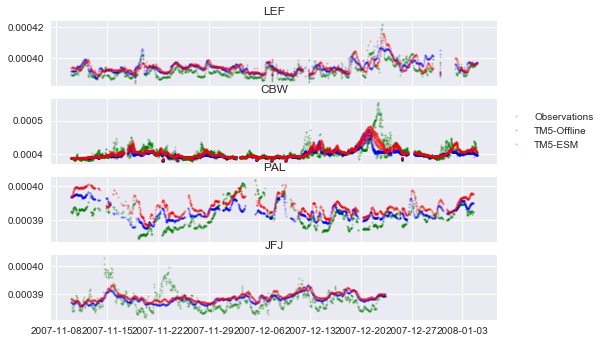

In [2]:
#TIME SERIES PLOT FOR SELECTED STATIONS
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/test'
macbookpath = '/Users/killaars/PhD/test/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(path):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,file)
            flask_mp = os.path.join(path,TM5_MP_filename)
            flask_esm = os.path.join(path,ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs,
                   'B_fmp_obs' : fmp_obs0,
                   'C_fesm_obs': fesm_obs,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)


CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
#print(df[JFJ])

f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True)
size = 2
alpha=.3
mask = LEF
ax1.set_title('LEF')
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=CBW
ax2.set_title('CBW')
ax2.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax2.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=PAL
ax3.set_title('PAL')
ax3.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax3.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=JFJ
ax4.set_title('JFJ')
ax4.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax4.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [59]:
#TIME SERIES PLOT FOR SELECTED STATIONS with errorbars - errorbars very small due to the very similar ensemble members
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/test'
macbookpath = '/Users/killaars/PhD/test/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fmp_obs1 = []
fmp_obs2 = []
fmp_obs3 = []
fmp_obs4 = []
fmp_obs5 = []
fmp_obs6 = []
fmp_obs7 = []
fmp_obs8 = []
fmp_obs9 = []

fesm_obs0 = []
fesm_obs1 = []
fesm_obs2 = []
fesm_obs3 = []
fesm_obs4 = []
fesm_obs5 = []
fesm_obs6 = []
fesm_obs7 = []
fesm_obs8 = []
fesm_obs9 = []
for root, dirs, files in os.walk(path):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,file)
            flask_mp = os.path.join(path,TM5_MP_filename)
            flask_esm = os.path.join(path,ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fmp_obs1 = np.append(fmp_obs1,flask_mp_fh.variables['flask'][:x,1])
            fmp_obs2 = np.append(fmp_obs2,flask_mp_fh.variables['flask'][:x,2])
            fmp_obs3 = np.append(fmp_obs3,flask_mp_fh.variables['flask'][:x,3])
            fmp_obs4 = np.append(fmp_obs4,flask_mp_fh.variables['flask'][:x,4])
            fmp_obs5 = np.append(fmp_obs5,flask_mp_fh.variables['flask'][:x,5])
            fmp_obs6 = np.append(fmp_obs6,flask_mp_fh.variables['flask'][:x,6])
            fmp_obs7 = np.append(fmp_obs7,flask_mp_fh.variables['flask'][:x,7])
            fmp_obs8 = np.append(fmp_obs8,flask_mp_fh.variables['flask'][:x,8])
            fmp_obs9 = np.append(fmp_obs9,flask_mp_fh.variables['flask'][:x,9])
            
            fesm_obs0 = np.append(fesm_obs0,flask_esm_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs1 = np.append(fesm_obs1,flask_esm_fh.variables['flask'][:x,1])
            fesm_obs2 = np.append(fesm_obs2,flask_esm_fh.variables['flask'][:x,2])
            fesm_obs3 = np.append(fesm_obs3,flask_esm_fh.variables['flask'][:x,3])
            fesm_obs4 = np.append(fesm_obs4,flask_esm_fh.variables['flask'][:x,4])
            fesm_obs5 = np.append(fesm_obs5,flask_esm_fh.variables['flask'][:x,5])
            fesm_obs6 = np.append(fesm_obs6,flask_esm_fh.variables['flask'][:x,6])
            fesm_obs7 = np.append(fesm_obs7,flask_esm_fh.variables['flask'][:x,7])
            fesm_obs8 = np.append(fesm_obs8,flask_esm_fh.variables['flask'][:x,8])
            fesm_obs9 = np.append(fesm_obs9,flask_esm_fh.variables['flask'][:x,9])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()
            

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in xrange(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs,
                   'B_fmp_obs' : fmp_obs0,
                   'C_fesm_obs': fesm_obs0,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)

ensemble = pd.DataFrame({'A_fin_obs' : fin_obs,
                        'mp0' : fmp_obs0,
                        'mp1' : fmp_obs1,
                        'mp2' : fmp_obs2,
                        'mp3' : fmp_obs3,
                        'mp4' : fmp_obs4,
                        'mp5' : fmp_obs5,
                        'mp6' : fmp_obs6,
                        'mp7' : fmp_obs7,
                        'mp8' : fmp_obs8,
                        'mp9' : fmp_obs9,
                        'esm0' : fesm_obs0,
                        'esm1' : fesm_obs1,
                        'esm2' : fesm_obs2,
                        'esm3' : fesm_obs3,
                        'esm4' : fesm_obs4,
                        'esm5' : fesm_obs5,
                        'esm6' : fesm_obs6,
                        'esm7' : fesm_obs7,
                        'esm8' : fesm_obs8,
                        'esm9' : fesm_obs9,
                        'D_alt'     : alt,
                        'E_lat'     : lat,
                        'F_lon'     : lon,
                        'G_date'    : time},index=obs_num)
                  

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland

CBW = (ensemble.E_lat>51) & (ensemble.E_lat<52) & (ensemble.F_lon>4) & (ensemble.F_lon<5) & (ensemble.G_date<'2007-11-10')#Cabauw in the Netherlands
PAL = (ensemble.E_lat>67) & (ensemble.E_lat<68) & (ensemble.F_lon>24) & (ensemble.F_lon<25) #PALLAS in Finland
mask = CBW

ensemble = ensemble[mask]
#print(fmp.duplicated('G_date'))
#print(df[JFJ])
sns.tsplot(ensemble.A_fin_obs, color='g',alpha=.2)
sns.tsplot([ensemble.mp0,ensemble.mp1,ensemble.mp2,ensemble.mp3,ensemble.mp4,ensemble.mp5,
            ensemble.mp6,ensemble.mp7,ensemble.mp8,ensemble.mp9],color='b',alpha=.2)
sns.tsplot([ensemble.esm0,ensemble.esm1,ensemble.esm2,ensemble.esm3,ensemble.esm4,ensemble.esm5,
            ensemble.esm6,ensemble.esm7,ensemble.esm8,ensemble.esm9],color='r',alpha=.2)
plt.show()

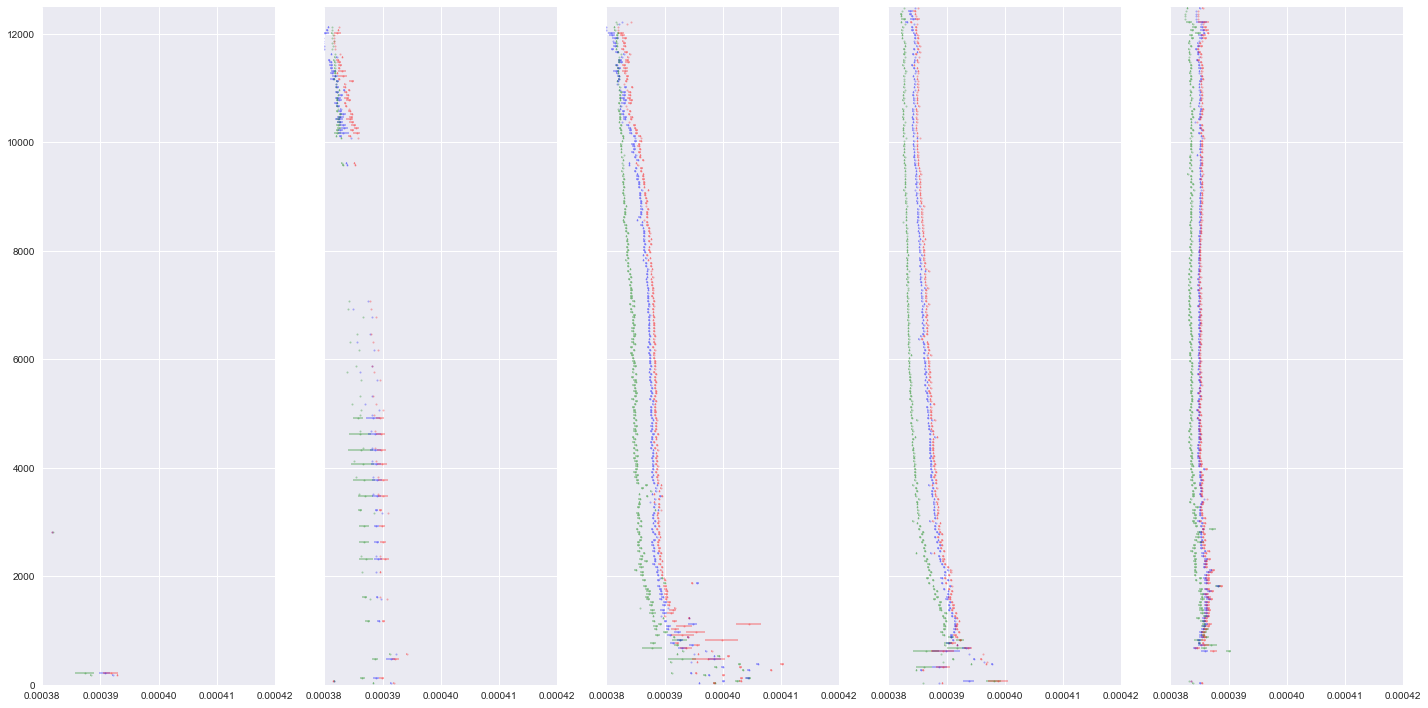

In [127]:
#Altitude plots
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/test'
macbookpath = '/Users/killaars/PhD/test/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(path):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,file)
            flask_mp = os.path.join(path,TM5_MP_filename)
            flask_esm = os.path.join(path,ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs,
                   'B_fmp_obs' : fmp_obs0,
                   'C_fesm_obs': fesm_obs,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)


CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data

POL = (df.E_lat>80) & (df.E_lat<100) | (df.E_lat<-80) & (df.E_lat>=-100)   # Poles
SUBPOL = (df.E_lat>60) & (df.E_lat<=80) | (df.E_lat<-60) & (df.E_lat>=-80) # Subpolair areas
TEM = (df.E_lat>40) & (df.E_lat<=60) | (df.E_lat<-40) & (df.E_lat>=-60)    # Temperate zones
SUBTRO = (df.E_lat>20) & (df.E_lat<=40) | (df.E_lat<-20) & (df.E_lat>=-40) # Subtropics
TRO = (df.E_lat>-20) & (df.E_lat<=20)                                      # Tropics

f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
size = 2
alpha=.3
mask = POL
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax1.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax1.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
plt.xlim(0.000380,0.00042)
plt.ylim(0,max(df.D_alt))

mask = SUBPOL
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax2.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax2.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')

mask = TEM
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax3.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax3.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')

mask = SUBTRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax4.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax4.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')

mask = TRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax5.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax5.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax5.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
plt.tight_layout()
plt.show()

In [16]:
df_grouped
#df_grouped.select(lambda x: x[0] > 0 and 2 <= x[1] == 'mean')
df_grouped

D_alt
5.000000        0.000388
6.000000        0.000385
7.000000        0.000383
8.000000        0.000384
10.000000       0.000395
12.000000       0.000382
13.000000       0.000383
14.000000       0.000382
15.000000       0.000382
16.000000       0.000387
17.000000       0.000387
19.000000       0.000410
20.000000       0.000384
21.000000       0.000390
22.000000       0.000382
24.000000       0.000386
25.000000       0.000388
26.000000       0.000386
27.459999       0.000389
27.500000       0.000389
28.000000       0.000385
30.000000       0.000393
31.340000       0.000389
32.000000       0.000381
35.000000       0.000382
47.000000       0.000383
50.000000       0.000387
52.000000       0.000383
55.000000       0.000382
57.040001       0.000389
                  ...   
12455.000000    0.000382
12457.000000    0.000382
12458.000000    0.000382
12462.000000    0.000382
12466.000000    0.000383
12468.000000    0.000382
12470.000000    0.000382
12471.000000    0.000384
12474.000000    0.0

In [ ]:
fig = plt.figure()
size = 2
alpha=.3
mask = GLOB
#plt.set_title('LEF')
plt.scatter(y=df.D_alt[mask], x=df.A_fin_obs[mask], color='g', alpha=alpha, s=size, label='Observations')
plt.scatter(y=df.D_alt[mask], x=df.B_fmp_obs[mask], color='b', alpha=alpha, s=size, label='TM5-Offline')
plt.scatter(y=df.D_alt[mask], x=df.C_fesm_obs[mask], color='r', alpha=alpha, s=size, label='TM5-ESM')
plt.xlim(0.000380,0.00045)
plt.show()

In [314]:
data = np.arange(10)
index = [1,2,3,1,2,3,1,2,3,4]
frame = pd.DataFrame({'data' : data},index=index)
frame

,data
1,0
2,1
3,2
1,3
2,4
3,5
1,6
2,7
3,8
4,9
